In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# ax[x,y].hist([normalized_loss[wrong_mask], normalized_loss[correct_mask]], \
#          histtype='stepfilled', bins=300, density=True, stacked=False,\
#          label=['incorrect', 'correct'], alpha=0.5)  # clor= ['g','r']
# ax[x,y].set_xlim(0, 1)
#    ax[x,y].hist(normalized_loss[wrong_mask], label='Mislabeled', stacked=True, bins=100, alpha=0.5, normed=True)
#    ax[x,y].hist(normalized_loss[correct_mask], label='Correct', stacked=True, bins=100,  alpha=0.5, normed=True, color='red')


#plot Loss distribution
# import matplotlib.pyplot as plt
# plt.figure()
# plt.hist([normalized_loss[wrong_mask], normalized_loss[correct_mask]], \
#         histtype='stepfilled', bins=100, density=True, stacked=True,\
#         label=['wrong label', 'correct label'], alpha=0.5)  # clor= ['g','r']
# plt.legend()
# plt.xlabel("normalized loss")
# plt.ylabel("probability density")
#plt.title('Normalized loss pdf in %.1f noise label'%noise_rate)

# from sklearn.neighbors.kde import KernelDensity
# kde = KernelDensity(bandwidth=0.01).fit(normalized_loss.reshape(-1,1))
# x_axis = np.linspace(0,1,100)
# density = np.exp(kde.score_samples(x_axis.reshape(-1,1)))
# plt.plot(x_axis, density, label='kde')
# plt.legend()

In [29]:
# ood noise
loss_file = "sample_selection-amazon-ood-noisy-0.4-2020-12-24-09-16-23.pkl.npy"
loss_list_matrix = np.load(loss_file)
# with open(loss_file,"rb") as f:
#     loss_list = pickle.load(f)
print(loss_list_matrix.shape)
all_mean_loss = np.mean(loss_list_matrix, axis=1)
print(all_mean_loss.shape)

source_file =  "/home/ubuntu/nas/projects/RDA/data/Office-31/amazon_ood_noisy_0.4.txt"
with open(source_file, 'r') as f:
    file_dir, true_labels, noise_labels = [], [], []
    for i in f.read().splitlines():
        file_dir.append(i.split(' ')[0])
        true_labels.append(int(i.split(' ')[1]))
        noise_labels.append(int(i.split(' ')[2]))
true_labels = np.array(true_labels)
noise_labels = np.array(noise_labels)
normalized_loss = all_mean_loss / np.max(all_mean_loss)
wrong_mask = noise_labels != true_labels
correct_mask = noise_labels == true_labels
print(correct_mask)

(4713, 30)
(4713,)
[ True  True  True ... False False False]


In [42]:
# mixed noise
loss_file = "sample_selection-amazon-ood_feature_uniform-noisy-0.6-2021-01-15-10-51-27.pkl.npy"
loss_list_matrix = np.load(loss_file)
# with open(loss_file,"rb") as f:
#     loss_list = pickle.load(f)
print(loss_list_matrix.shape)
all_mean_loss = np.mean(loss_list_matrix, axis=1)
normalized_loss = all_mean_loss / np.max(all_mean_loss)
print(all_mean_loss.shape)

source_file =  "/home/ubuntu/nas/projects/RDA/data/Office-31/amazon_ood_feature_uniform_noisy_0.6.txt"
with open(source_file, 'r') as f:
    file_dir = []
    true_mask = np.zeros((all_mean_loss.shape[0]), dtype=bool)
    print(true_mask.shape)
    noise_labels_mask = np.zeros((all_mean_loss.shape[0]), dtype=bool)
    noise_feature_mask = np.zeros((all_mean_loss.shape[0]), dtype=bool)
    noise_ood_mask = np.zeros((all_mean_loss.shape[0]), dtype=bool)
    for j, i in enumerate(f.read().splitlines()):
        file_dir.append(i.split(' ')[0])
        if int(i.split(' ')[1]) == int(i.split(' ')[2]):
            if i.split(' ')[0].split('_')[-1] == 'corrupted.jpg':
                noise_feature_mask[j] = 1
            else:
                true_mask[j] = 1
        else:
            if int(i.split(' ')[2]) == "32":
                noise_ood_mask[j] = 1
            else:
                noise_labels_mask[j] = 1
print(true_mask, noise_labels_mask, noise_feature_mask, noise_ood_mask)
# true_labels = np.array(true_labels)
# noise_labels = np.array(noise_labels)
# wrong_mask = noise_labels != true_labels
# correct_mask = noise_labels == true_labels

(3530, 30)
(3530,)
(3530,)
[ True  True  True ... False False False] [False False False ...  True  True  True] [False False False ... False False False] [False False False ... False False False]


/home/ubuntu/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


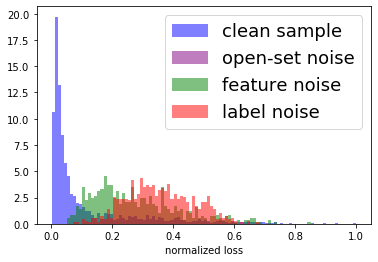

In [46]:
plt.figure()
plt.hist([normalized_loss[noise_labels_mask], normalized_loss[noise_feature_mask], normalized_loss[noise_ood_mask], normalized_loss[true_mask]], \
        histtype='stepfilled', bins=100, density=True, stacked=False,\
        label=['label noise', 'feature noise', 'open-set noise', 'clean sample'], alpha=0.5, color= ['r', 'g', 'purple','b'])
plt.legend(fontsize=18)
plt.xlabel("normalized loss")
#plt.ylabel("probability density")
plt.savefig("mixed-noise.pdf")

/home/ubuntu/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


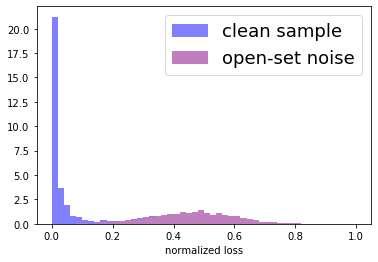

In [28]:
plt.figure()
plt.hist([normalized_loss[wrong_mask], normalized_loss[correct_mask]], \
        histtype='stepfilled', bins=50, density=True, stacked=True,\
        label=['open-set noise', 'clean sample'], alpha=0.5, color= ['purple','b'])
plt.legend(fontsize=18)
plt.xlabel("normalized loss")
#plt.ylabel("probability density")
plt.savefig("open-set-noise.pdf")